In [2]:
from PIL import Image, ImageEnhance
import matplotlib.pyplot as plt
import os
from pathlib import Path

# Display images side‑by‑side
def show_images(images, titles):
    fig, axes = plt.subplots(1, len(images), figsize=(5 * len(images), 5))
    if len(images) == 1:
        axes = [axes]
    for ax, img, title in zip(axes, images, titles):
        ax.imshow(img)
        ax.set_title(title)
        ax.axis('off')
    plt.show()


In [3]:
# Folders
input_folder = Path(r"C:\\Users\\riley\\Documents\\GitHub\\RileyHerbstProject\\DEMO\\Images")
output_folder = Path(r"C:\\Users\\riley\\Documents\\GitHub\\RileyHerbstProject\\DEMO\\Output")

# Resize dimensions
TARGET_WIDTH  = 1500
TARGET_HEIGHT = 2250

# Enhancement factors
BRIGHTNESS_FACTOR = 0.9
SATURATION_FACTOR = 1.2

# Supported formats
SUPPORTED_FORMATS = ['.jpg', '.jpeg', '.png', '.bmp', '.tiff']


In [4]:
def resize_image(img: Image.Image) -> Image.Image:
    if img.mode != 'RGB':
        img = img.convert('RGB')
    return img.resize((TARGET_WIDTH, TARGET_HEIGHT), Image.Resampling.LANCZOS)


In [5]:
def enhance_image(img: Image.Image,
                  brightness_factor: float = BRIGHTNESS_FACTOR,
                  saturation_factor: float = SATURATION_FACTOR) -> Image.Image:
    img_bright = ImageEnhance.Brightness(img).enhance(brightness_factor)
    img_sat   = ImageEnhance.Color(img_bright).enhance(saturation_factor)
    return img_sat


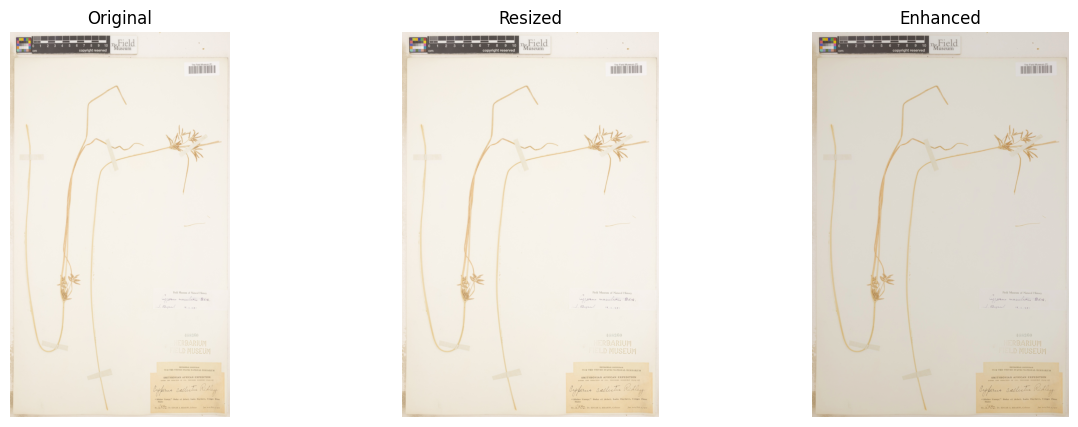

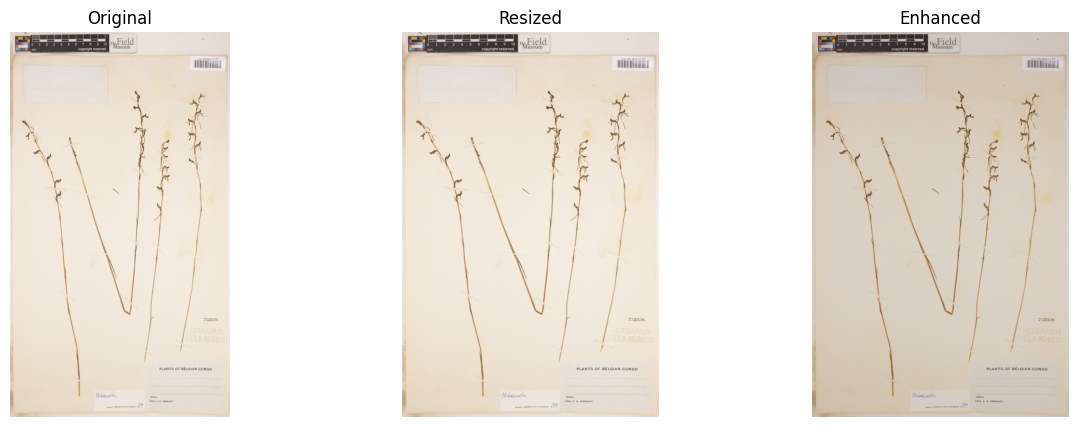

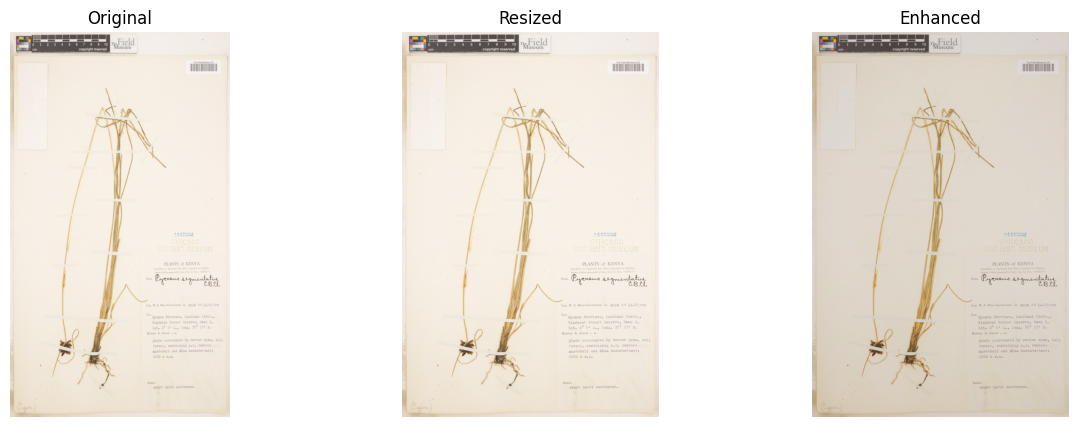

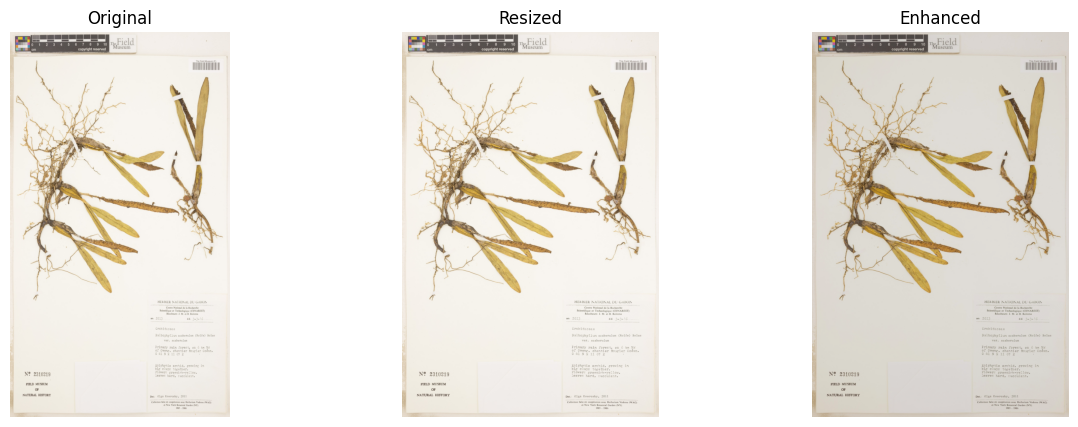

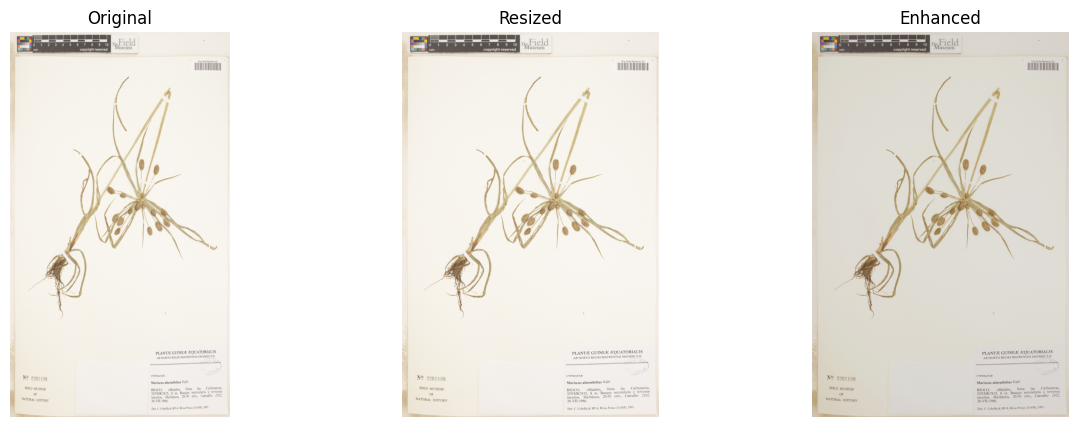

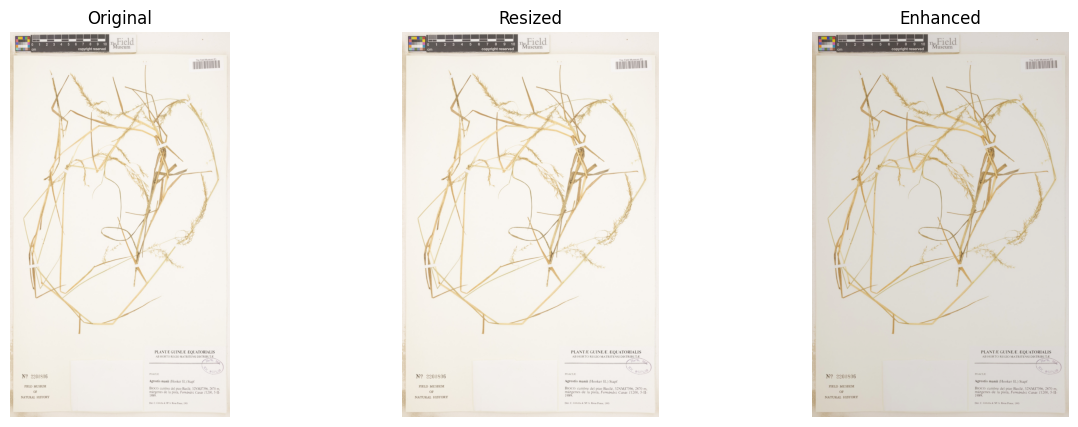

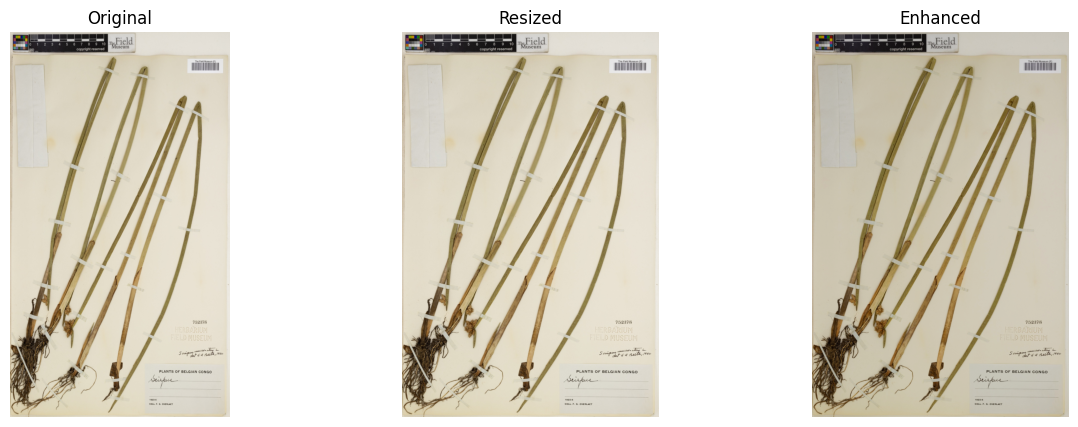

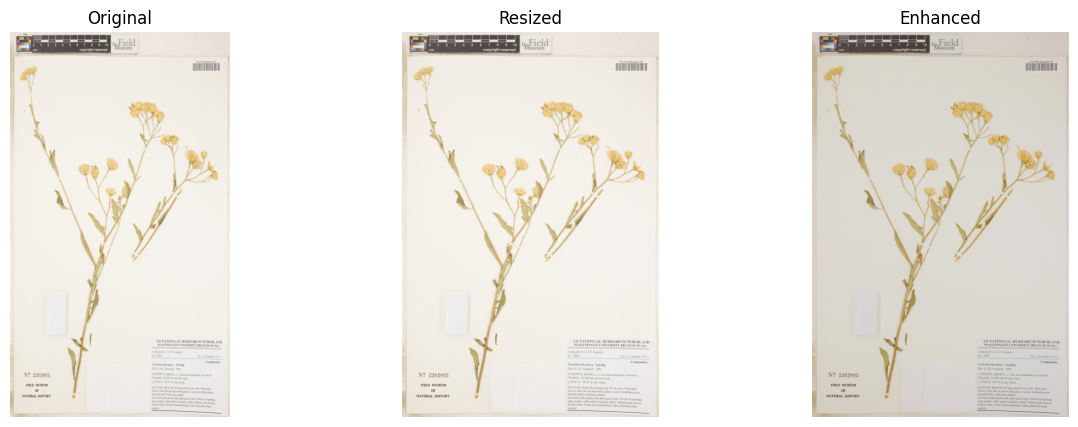

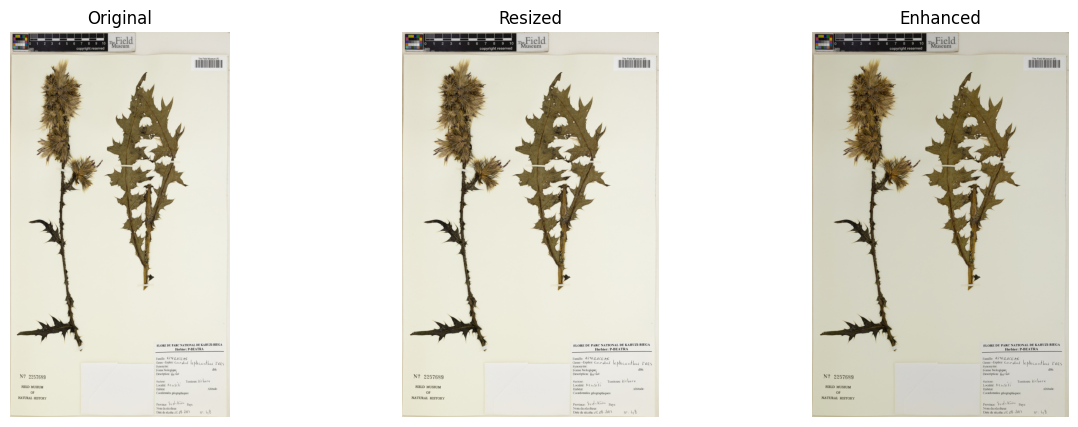

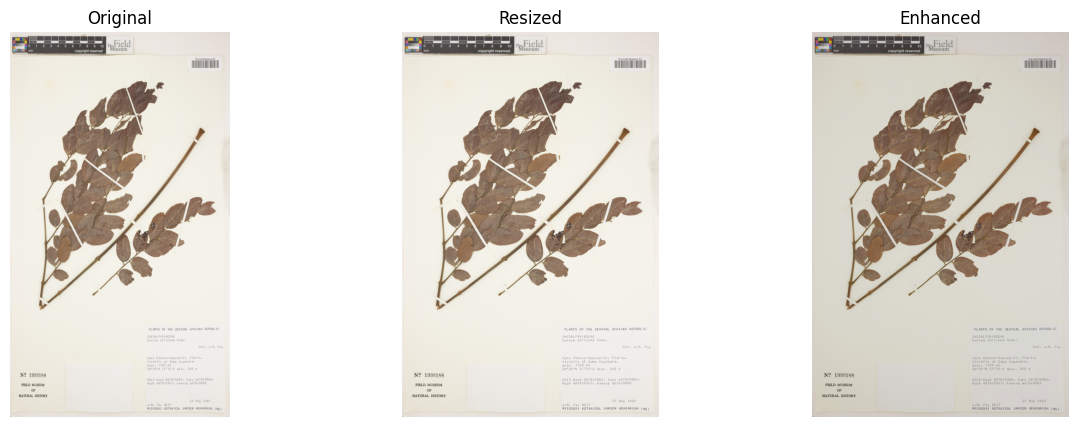

Processing complete. Enhanced images saved to: C:\Users\riley\Documents\GitHub\RileyHerbstProject\DEMO\Output


In [6]:
output_folder.mkdir(parents=True, exist_ok=True)

for img_path in input_folder.iterdir():
    if img_path.suffix.lower() not in SUPPORTED_FORMATS:
        continue

    # Open original
    original = Image.open(img_path)
    resized  = resize_image(original)
    enhanced = enhance_image(resized)

    # Display sequence
    show_images([original, resized, enhanced],
                ['Original', 'Resized', 'Enhanced'])

    # Save enhanced image
    enhanced.save(output_folder / f"sat_{img_path.name}", quality=95)

print(f"Processing complete. Enhanced images saved to: {output_folder}")
